### Import Dataset

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
data = pd.read_csv('penguins_size.csv')

In [5]:
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


### Basic Information about data

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [8]:
data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [9]:
data.shape

(344, 7)

In [24]:
data['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [16]:
data.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [32]:
data['culmen_length_mm'].fillna(data['culmen_length_mm'].mean(), inplace=True)

In [34]:
data['culmen_depth_mm'].fillna(data['culmen_depth_mm'].mean(), inplace=True)

In [35]:
data['flipper_length_mm'].fillna(data['flipper_length_mm'].mean(), inplace=True)

In [37]:
data['body_mass_g'].fillna(data['body_mass_g'].mean(), inplace=True)

<AxesSubplot:>

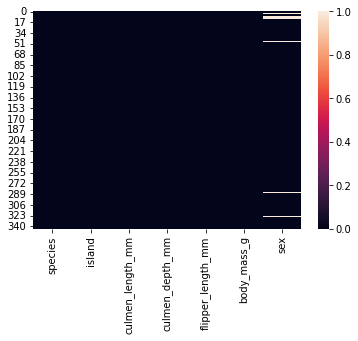

In [38]:
sns.heatmap(data.isnull())

In [40]:
data['sex'].value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

In [41]:
data['sex'] = data['sex'].fillna('MALE')

In [44]:
data['sex'].replace({".":'FEMALE'}, inplace=True)

In [46]:
data['sex'].value_counts()

MALE      178
FEMALE    166
Name: sex, dtype: int64

<AxesSubplot:>

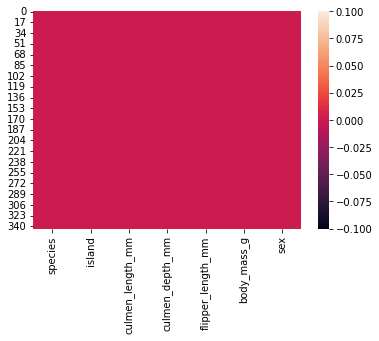

In [47]:
sns.heatmap(data.isnull())

### Locations of Penguins

In [48]:
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,MALE
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,FEMALE
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,MALE
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE


In [49]:
data['island'].value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

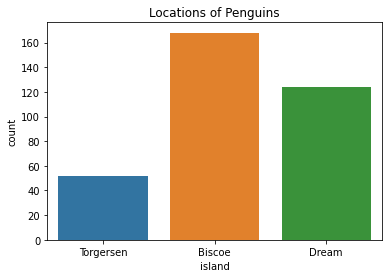

In [55]:
sns.countplot(x=data['island'], data=data)
plt.title('Locations of Penguins')
plt.show()

### Population of Penguins by gender on each island

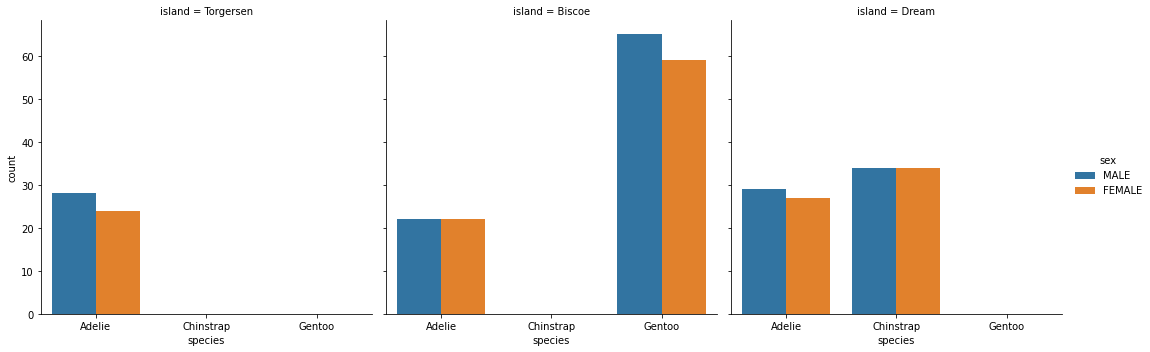

In [64]:
sns.catplot(x="species", hue="sex", col="island",data=data, kind="count")
plt.show()

### Analysis on structure of penguins

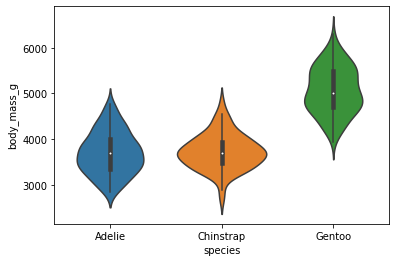

In [70]:
sns.violinplot(x = data['species'], y=data['body_mass_g'])
plt.show()

### Correlation Between the data

<AxesSubplot:>

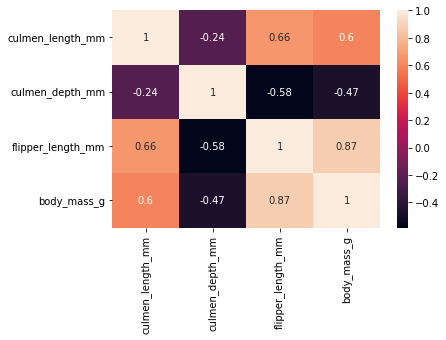

In [74]:
sns.heatmap(data.corr(),annot=True)

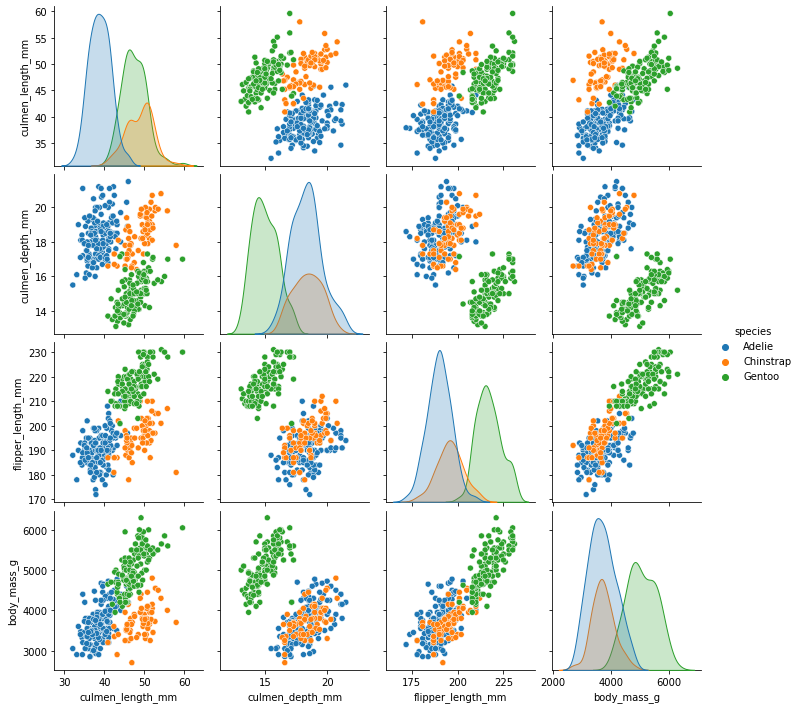

In [85]:
sns.pairplot(data, hue='species')
plt.show()

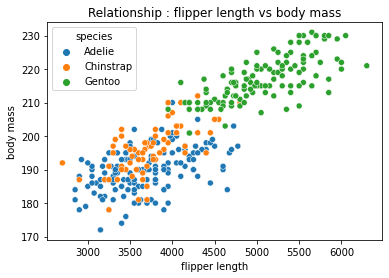

In [82]:
sns.scatterplot(x=data['body_mass_g'], y=data['flipper_length_mm'], hue=data['species'])
plt.title("Relationship : flipper length vs body mass")
plt.xlabel("flipper length")
plt.ylabel("body mass")
plt.show()